<a href="https://colab.research.google.com/github/jhbeann/fast_deep/blob/main/2-2Pareto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Mount Drive

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [2]:
!ls -al '/gdrive/My Drive/data'

total 2171732
-rw------- 1 root root    337847 Oct 21 05:44 data_202001.csv
-rw------- 1 root root    314682 Oct 13 10:05 data_202002.csv
-rw------- 1 root root    335953 Oct 13 10:05 data_202003.csv
-rw------- 1 root root    988308 Oct 21 06:07 data_2020.csv
-rw------- 1 root root 783889122 Oct 20 09:02 TCS_영업소간통행시간_1시간_1개월_202001
-rw------- 1 root root 699429059 Oct 20 10:56 TCS_영업소간통행시간_1시간_1개월_202002
-rw------- 1 root root 738556069 Oct 20 10:55 TCS_영업소간통행시간_1시간_1개월_202003


# 2. Korean Characters

In [3]:
# 한글 폰트 깨질 때
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

런타임 - 런타임 다시시작

In [4]:
# import pyplot as a alias 'plt'
import matplotlib.pyplot as plt

In [5]:
plt.rc('font',family ='NanumBarunGothic')

# 3. Load Data

In [6]:
import pandas as pd

In [7]:
# Load a file under "data" folder
file = "/gdrive/My Drive/data/data_2020.csv"
data = pd.read_csv(file)

In [8]:
data.head()

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간,요일
0,20200101,4,101,105,637,2
1,20200101,4,101,105,773,2
2,20200101,4,101,105,762,2
3,20200101,4,101,105,746,2
4,20200101,4,101,105,875,2


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37356 entries, 0 to 37355
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   집계일자     37356 non-null  int64
 1   집계시      37356 non-null  int64
 2   출발영업소코드  37356 non-null  int64
 3   도착영업소코드  37356 non-null  int64
 4   통행시간     37356 non-null  int64
 5   요일       37356 non-null  int64
dtypes: int64(6)
memory usage: 1.7 MB


# 4. 집계시

In [10]:
data_06_22 = data[data.집계시.isin(range(6,23))]

In [11]:
data_06_22.sort_values(by='집계시')

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간,요일
25164,20200302,6,101,110,2772,0
22064,20200213,6,101,130,8044,3
12199,20200130,6,101,115,6542,3
6518,20200117,6,101,105,806,4
28006,20200309,6,101,115,7670,0
...,...,...,...,...,...,...
15006,20200207,22,101,105,991,4
16139,20200209,22,101,130,9075,6
28346,20200310,22,101,115,4747,1
16141,20200209,22,101,130,7947,6


In [12]:
data_06_22_counting = data_06_22['집계시'].value_counts()

In [13]:
data_06_22_counting

14    1766
12    1758
15    1755
13    1754
11    1744
10    1725
16    1724
17    1719
9     1703
18    1666
8     1662
19    1628
20    1611
7     1585
21    1559
22    1505
6     1440
Name: 집계시, dtype: int64

In [14]:
# Store index of data_06_22_counting into x
x = data_06_22_counting.index

In [15]:
x =[str(i) for i in x]

In [16]:
x

['14',
 '12',
 '15',
 '13',
 '11',
 '10',
 '16',
 '17',
 '9',
 '18',
 '8',
 '19',
 '20',
 '7',
 '21',
 '22',
 '6']

In [17]:
y = data_06_22_counting.values

In [19]:
# Calculate ratio and accumulated ratio
ratio = y / y.sum()
ratio_sum = ratio.cumsum()

[0.  0.2 0.4 0.6 0.8 1.  1.2]


<ipython-input-20-c34f5908e6b2>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  lineChart.set_yticklabels(['{:,.1%}'.format(x) for x in ranges])


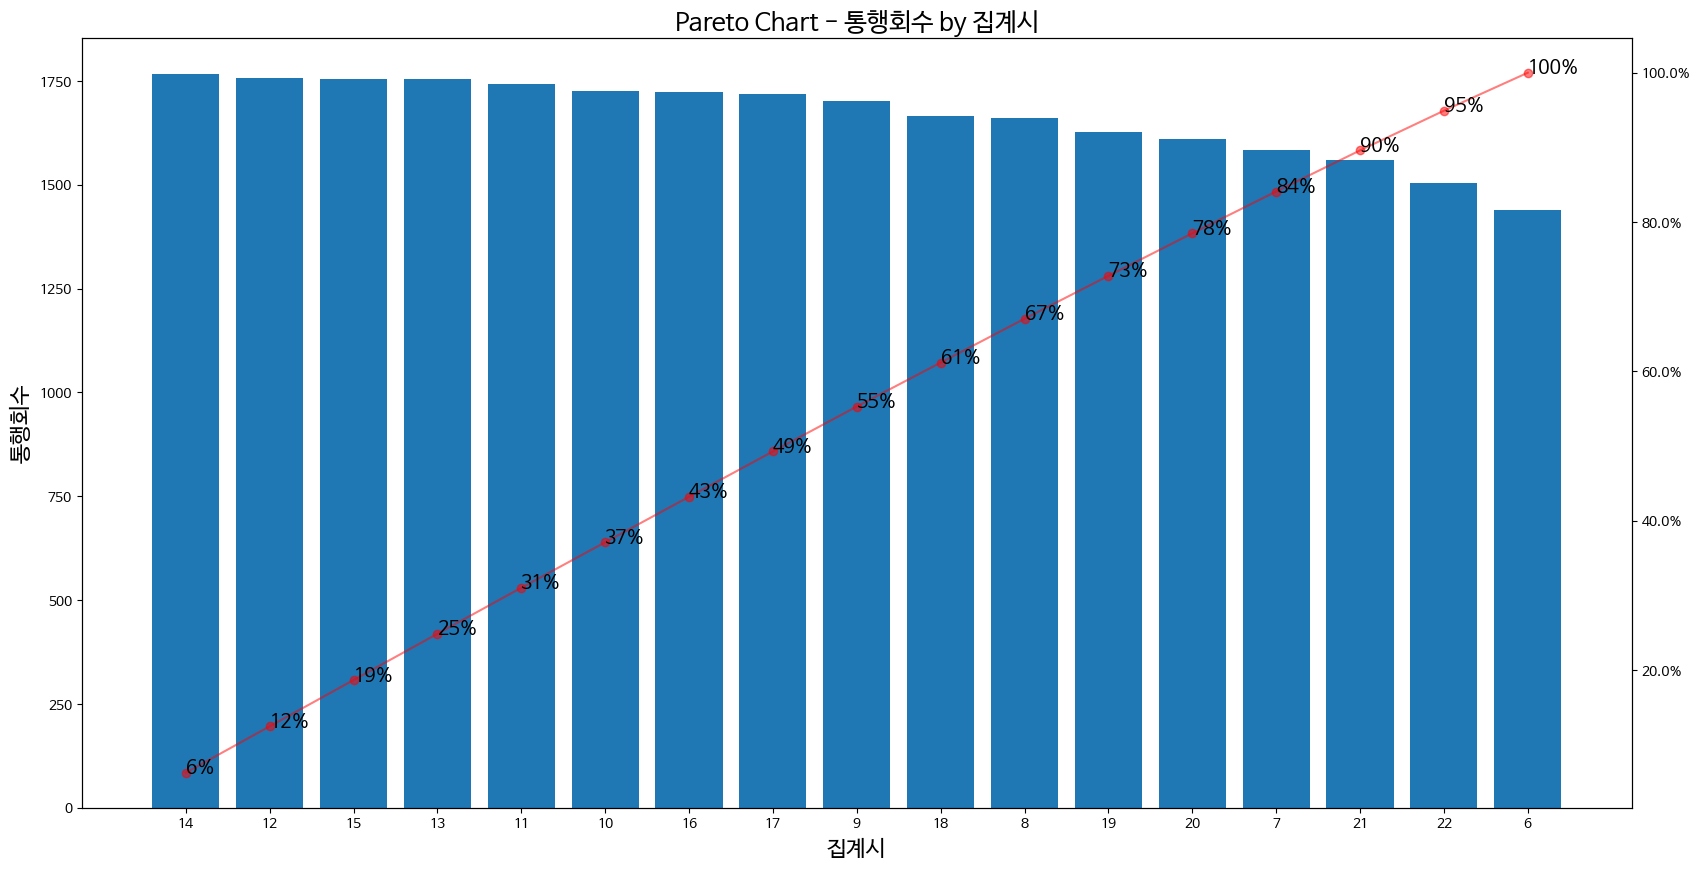

In [20]:
# Configure figure size
fig, barChart = plt.subplots(figsize=(20,10))
# Creae bar Chart
barChart.bar(x, y)
# Creae line Chart
lineChart = barChart.twinx()
lineChart.plot(x, ratio_sum, '-ro', alpha=0.5)
# Creae right side labels
ranges = lineChart.get_yticks()
print(ranges)
lineChart.set_yticklabels(['{:,.1%}'.format(x) for x in ranges])
# Creae annotations on line chart
ratio_sum_percentages = ['{0:.0%}'.format(x) for x in ratio_sum]
for i, txt in enumerate(ratio_sum_percentages):
    lineChart.annotate(txt, (x[i], ratio_sum[i]), fontsize=14)
# Generate labels and title
barChart.set_xlabel('집계시', fontdict= {'size':16})
barChart.set_ylabel('통행회수', fontdict= {'size':16})
plt.title('Pareto Chart - 통행회수 by 집계시', fontsize=18)
# Show plot
plt.show()

# 5.도착영업소코드

In [21]:
data_destination_counting = data['도착영업소코드'].value_counts()

In [22]:
data_destination_counting

105    12274
110     9419
115     6509
140     2235
130     1972
135     1759
125     1677
120     1511
Name: 도착영업소코드, dtype: int64

In [23]:
# store index of data_destination_counting into x
x = data_destination_counting.index
# x는 integer

In [24]:
x = [str(i) for i in x]

In [26]:
# store values of data_destination_counting into y
y = data_destination_counting.values

In [27]:
# calculate ratio and accumulated ratio
ratio = y /y.sum()
ratio_sum = ratio.cumsum()

[0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1]


<ipython-input-28-42b369cc955a>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  lineChart.set_yticklabels(['{:,.1%}'.format(x) for x in ranges])


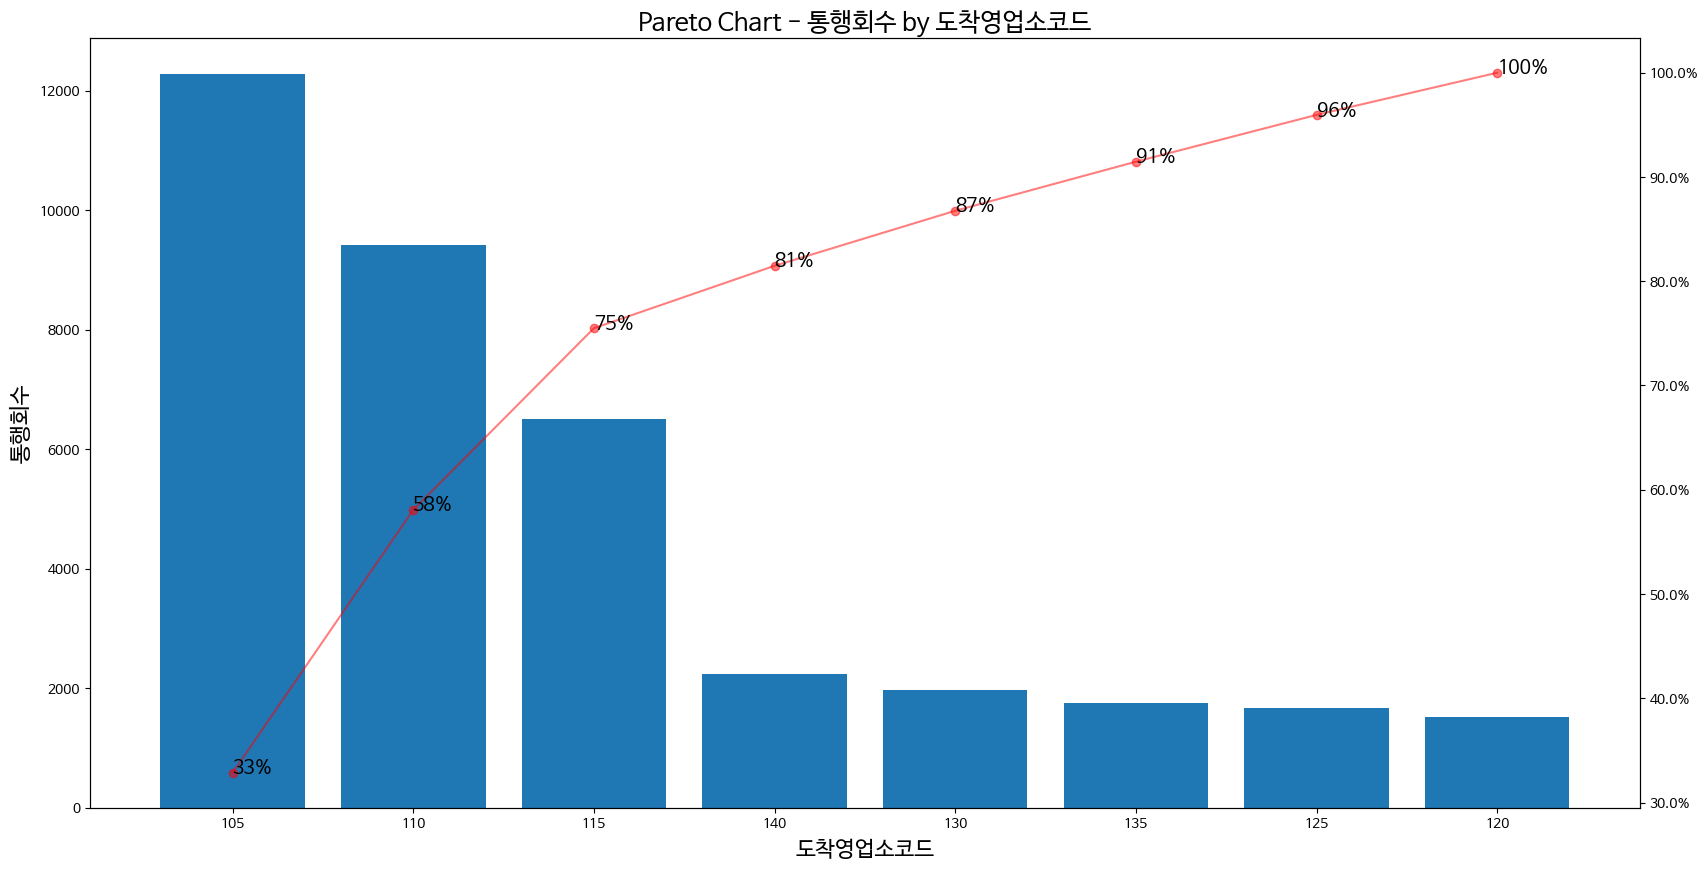

In [28]:
# Configure figure size
fig, barChart = plt.subplots(figsize=(20,10))
# Creae bar Chart
barChart.bar(x, y)
# Creae line Chart
lineChart = barChart.twinx()
lineChart.plot(x, ratio_sum, '-ro', alpha=0.5)
# Creae right side labels
ranges = lineChart.get_yticks()
print(ranges)
lineChart.set_yticklabels(['{:,.1%}'.format(x) for x in ranges])
# Creae annotations on line chart
ratio_sum_percentages = ['{0:.0%}'.format(x) for x in ratio_sum]
for i, txt in enumerate(ratio_sum_percentages):
    lineChart.annotate(txt, (x[i], ratio_sum[i]), fontsize=14)
# Generate labels and title
barChart.set_xlabel('도착영업소코드', fontdict= {'size':16})
barChart.set_ylabel('통행회수', fontdict= {'size':16})
plt.title('Pareto Chart - 통행회수 by 도착영업소코드', fontsize=18)
# Show plot
plt.show()